In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
import warnings
from matplotlib import pyplot as plt
from matplotlib import axes
warnings.simplefilter(action='ignore')
%matplotlib inline

provinces = [10, 41, 50, 70, 90]

folder = 'D:/School/Thesis/output/default_prophet/all_prov_monthly/all_prov_monthly_'

In [11]:
# loads the error dataframe
def load_error_df(folder, how_many_years_out=1):
    # load the data
    file_path = folder + str(how_many_years_out) + '/monthly_errors_' + str(how_many_years_out) + '.csv'
    error_df = pd.read_csv(file_path)
    error_df['province'] = error_df['province'].astype(int)
    error_df['year'] = error_df['year'].astype(int)
    error_df['peak_month_error'] = error_df['peak_month_error'].astype(int)
    
    return error_df

In [12]:
# makes a graph for specified province, however many years out
def make_a_graph(province, df, how_many_years_out=1):
    prov_df = df.loc[df['province'] == province]
    ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, palette="Blues_d", ci=0)
    ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
    plt.title('Province ' + str(province) + ', ' + str(how_many_years_out) + ' Year(s) Out')
    plt.show()

In [13]:
# makes a graph for each province for provinces made the specified number of years out
def make_a_buncha_graphs(folder, how_many_years_out=1):
    file = folder + str(how_many_years_out) + '/monthly_errors_' + str(how_many_years_out) + '.csv'
    monthly_errors = load_error_df(file)

    for province in provinces:
        make_a_graph(province, monthly_errors, how_many_years_out)

In [14]:
make_a_buncha_graphs(1)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [6]:
make_a_buncha_graphs(3)

ValueError: stat: path too long for Windows

In [68]:
# load all the data and combine into one dataframe
# make a column for the "trajectories" should be able to track the error when training on the same number of months
# the color of the error bars should be the same for all the data trained on 2006, then all the data trained on 2006+2007, etc

all_years_out_df = pd.DataFrame(columns=['province','year','monthly_case_rmse','year_total_error','peak_error','peak_month_error', 'how_many_years_out'])
trajectory_index_list = []

for i in range(1, 11):
    df = load_error_df(i)
    df['how_many_years_out'] = i
    all_years_out_df = pd.concat([all_years_out_df, df])
    
    trajectory_index_list.append(np.arange(i, 11))

traj_ind_all_prov = np.repeat(trajectory_index_list, 5)
traj_ind_all_prov = np.concatenate(traj_ind_all_prov)
all_years_out_df['trajectory'] = traj_ind_all_prov

all_years_out_df['province'] = all_years_out_df['province'].astype(int)
all_years_out_df['year'] = all_years_out_df['year'].astype(int)
all_years_out_df['peak_month_error'] = all_years_out_df['peak_month_error'].astype(int)
all_years_out_df['how_many_years_out'] = all_years_out_df['how_many_years_out'].astype(int)
all_years_out_df

,province,year,monthly_case_rmse,year_total_error,peak_error,peak_month_error,how_many_years_out,trajectory
0,10,2007,6918.611158,68055.133816,1021.902836,0,1,1
1,10,2008,354.612023,3175.230127,657.240202,4,1,2
2,10,2009,350.743696,4024.685753,289.928920,1,1,3
3,10,2010,261.048009,582.812746,357.389466,0,1,4
4,10,2011,235.575738,899.041839,60.443342,4,1,5
5,10,2012,366.335098,518.200884,708.604236,1,1,6
6,10,2013,245.275974,1530.371883,264.531633,3,1,7
7,10,2014,461.887580,5275.648628,549.365060,0,1,8
8,10,2015,1395.999525,9429.010689,4054.503489,0,1,9
9,10,2016,591.987069,5568.823741,528.498699,10,1,10


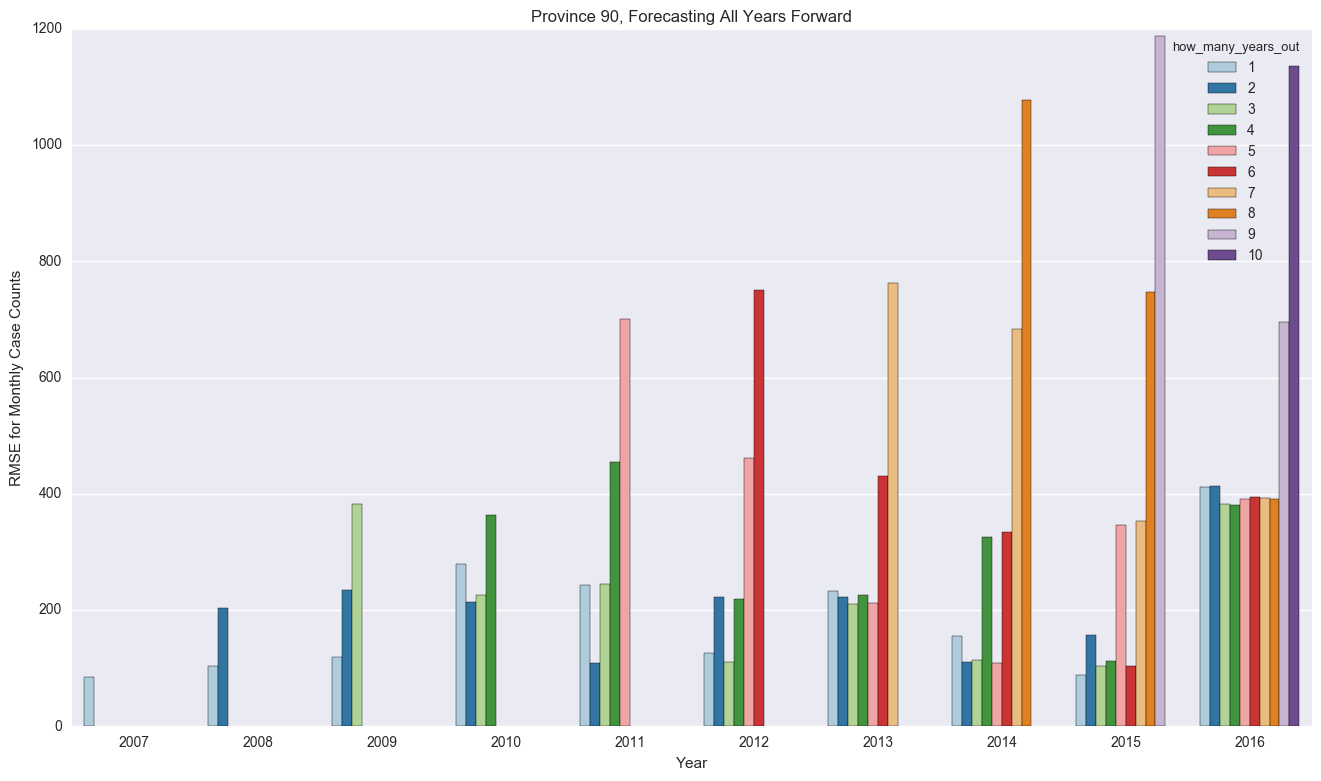

In [81]:
province = 90

prov_df = all_years_out_df.loc[all_years_out_df['province'] == province]

sns.set()
plt.subplots(figsize=(16,9))
# plt.rcParams['axes.facecolor'] = 'white'
# hue is either trajectory or how_many_years_out
ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, ci=0, hue='how_many_years_out', palette='Paired')
ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
plt.title('Province ' + str(province) + ', ' + 'Forecasting All Years Forward')
plt.show()

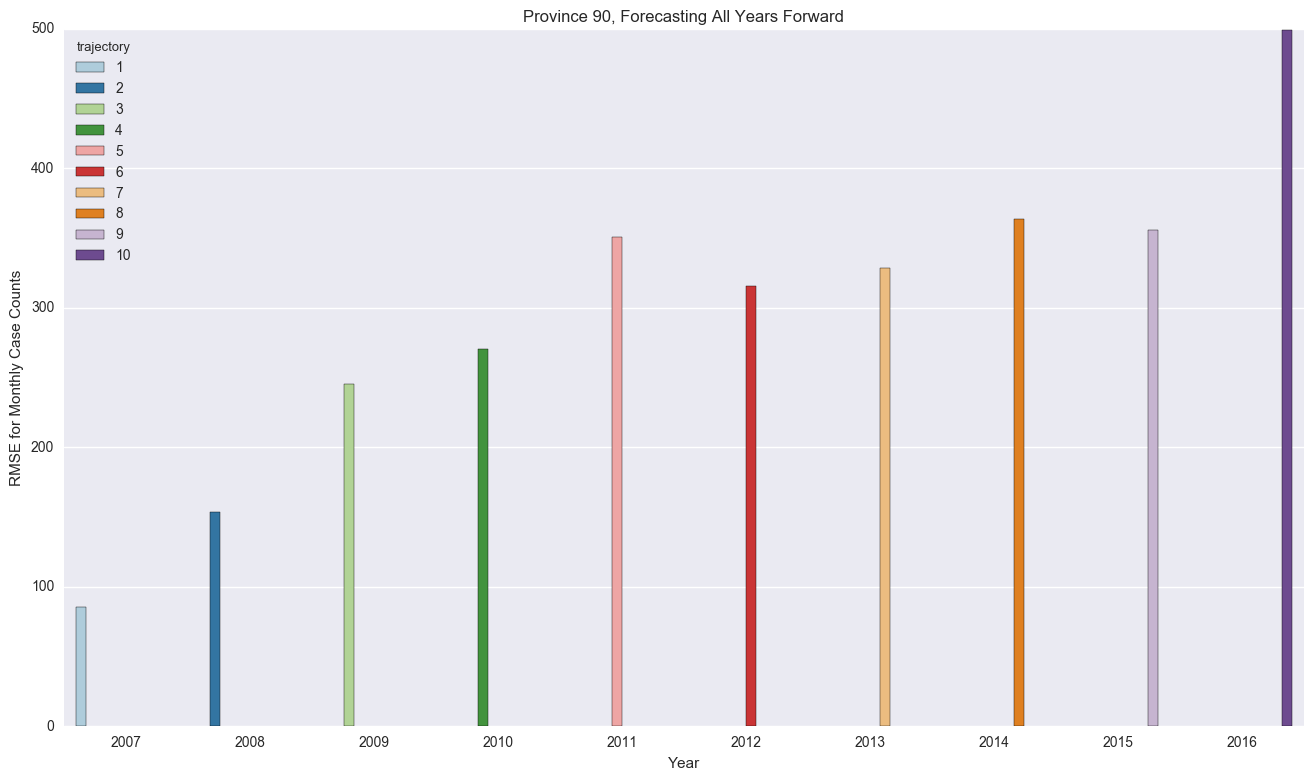

In [82]:
plt.subplots(figsize=(16,9))
# plt.rcParams['axes.facecolor'] = 'white'
# hue is either trajectory or how_many_years_out
ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, ci=0, hue='trajectory', palette='Paired')
ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
plt.title('Province ' + str(province) + ', ' + 'Forecasting All Years Forward')
plt.show()